Framework: Tensorflow 2.0 Classifier

Classification problem: Breast cancer dataset from Sklearn to classifiy identified cell as Benign and Malignant

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#Load the dataset from sklearn
from sklearn.datasets import load_breast_cancer

In [ ]:
#Load the data
data = load_breast_cancer()
#print(data)

In [ ]:
#check the type of the data
type(data)

# Bunch dataset - meaning dataset will be like dictionary format; key-value pair

<class 'sklearn.utils.Bunch'>


In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#Data attribute means input samples
data.data.shape

(569, 30)

In [ ]:
#check the target variable, targets are in the form of 0 and 1
data.target.shape

(569,)

In [ ]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.33)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
N,D = x_train.shape

(381, 30) (381,) (188, 30) (188,)


In [ ]:
#Pre process the data
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scale the value of X_train and y_train
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [ ]:
#Build the model in tensorflow
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,), activation='sigmoid'))

#Define loss and optimizer
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

#Fit the model
ret=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100)

#Evaluate the model - model.evaluate() - prints loss and accuracy
print("Train score= ", model.evaluate(x_train,y_train))
print("Test score = ", model.evaluate(x_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 14ms/step - loss: 0.4480 - accuracy: 0.7953 - val_loss: 0.4013 - val_accuracy: 0.8617
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4160 - accuracy: 0.8136 - val_loss: 0.3748 - val_accuracy: 0.8723
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8294 - val_loss: 0.3505 - val_accuracy: 0.8883
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3623 - accuracy: 0.8451 - val_loss: 0.3292 - val_accuracy: 0.8989
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3395 - accuracy: 0.8556 - val_loss: 0.3101 - val_accuracy: 0.9096
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3198 - accuracy: 0.8766 - val_loss: 0.2926 - val_accuracy: 0.9149
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3015 - accuracy: 0.8819 - val_loss: 0.2774 - val_accuracy: 0.9202
Epoch 8/100


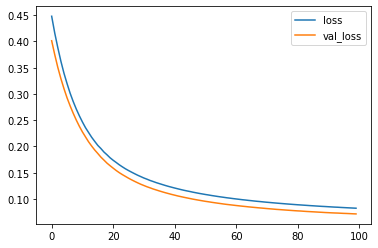

In [ ]:
#Plot the model.fit() return
import matplotlib.pyplot as plt
plt.plot(ret.history['loss'],label='loss')
plt.plot(ret.history['val_loss'],label='val_loss')
plt.legend()

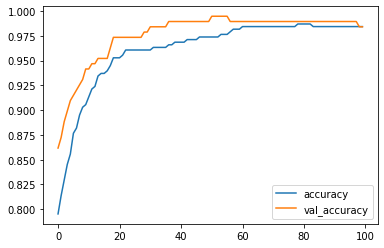

In [ ]:
plt.plot(ret.history['accuracy'],label='accuracy')
plt.plot(ret.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
pred = model.predict(x_test)

In [ ]:
#flatten the predictions from (N,) to (N,1)
import numpy as np
pred = np.round(pred).flatten()
print(pred)

[1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0.]


In [ ]:
#Evalauate the model
#compare the predictions with y_test manually
print("Accuracy of y_test= ", np.mean(pred==y_test))
print("Accuracy of x_test= ",model.evaluate(x_test,y_test))

Accuracy of y_test=  0.9840425531914894
6/6 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9840
Accuracy of x_test=  [0.07149039208889008, 0.9840425252914429]


In [ ]:
#Save the model
model.save('cancerclassifier.h5')

In [ ]:
#check that model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Aug 11 10:05 cancerclassifier.h5
drwxr-xr-x 1 root root 4.0K Jul 30 16:30 sample_data


In [ ]:
#Load the model and evaluate with x_test andy_test
model = tf.keras.models.load_model('cancerclassifier.h5')
model.evaluate(x_test,y_test)
print(model.layers)

6/6 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9628


In [ ]:
#Download the file
from google.colab import files
files.Download('cancerclassifier.h5')